In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as tm

# directly using tree was not working so had to import thr sklearner separately 
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [315]:
cd ~/

/Users/ssandesh


In [396]:
dataset1 = pd.read_csv('ML_Gatech/Project1/datasets/water_potability.csv')

In [397]:
# before we move forward we need to remove certain columns that won't be helpful to us
print(dataset1.columns.values)
#dataset1.head
#df_twitter = dataset1.drop(labels=['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id'], axis=1)

['ph' 'Hardness' 'Solids' 'Chloramines' 'Sulfate' 'Conductivity'
 'Organic_carbon' 'Trihalomethanes' 'Turbidity' 'Potability']


In [398]:
# get the train, test split
dataset1 = shuffle(dataset1) 
dataset1.dropna(inplace=True)
X  = dataset1.iloc[:, :-1]
Y =  dataset1.iloc[:, -1]
#X.fillna(Y.mean(), inplace=True)
#Y.fillna(Y.mode()[0], inplace=True)
print(dataset1['Potability'].value_counts())
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)


0    1200
1     811
Name: Potability, dtype: int64


In [399]:
dataset1.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


In [400]:
fit_time = np.zeros(5) # one for each algorithm 
inference_time = np.zeros(5)
accuracy_before = np.zeros(5)
accuracy_after = np.zeros(5)
algotrithms = np.array(['Decision Tree', 'KNN', 'Ada Boosting', 'SVM', 'Neural Network'])

# # Section 1 : Decion Tree Classifier

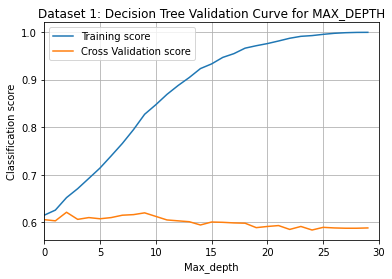

In [401]:
# The two hyperparameter we will be experimenting with are : Max_depth and 
# for the random_state we will again use 10 so the behavior is determistic as this would control the random number
# generator
clf_dt = DecisionTreeClassifier( random_state=7, splitter='best', criterion='entropy')
clf_dt = clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
accuracy_before[0] = metrics.accuracy_score(y_test, y_pred)*100
cv = StratifiedKFold(n_splits=5)
train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_name="max_depth", 
                                             param_range=np.arange(30) + 1, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset 1: Decision Tree Validation Curve for MAX_DEPTH')
plt.xlabel('Max_depth')
plt.ylabel("Classification score")
plt.xlim([0,30])
plt.legend(loc="best")
plt.grid()
plt.show()

In [402]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)
#print(impurities)

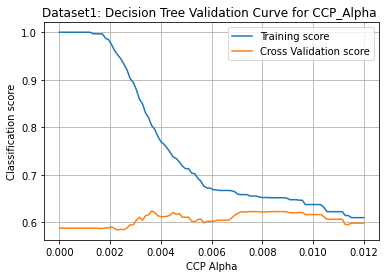

In [403]:
cv = StratifiedKFold(n_splits=5)
train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_name="ccp_alpha", 
                                             param_range=np.linspace(0,0.015,100), cv=cv, n_jobs=-1)

plt.figure()
plt.plot(np.linspace(0,0.012,100), np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.linspace(0,0.012,100),np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset1: Decision Tree Validation Curve for CCP_Alpha ')
plt.xlabel('CCP Alpha')
plt.ylabel("Classification score")
#plt.xlim([0,30])
plt.legend(loc="best")
plt.grid()
plt.show()

<AxesSubplot:>

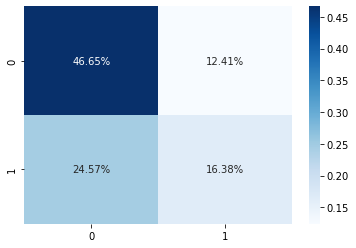

In [404]:
max_depth_best = 4
ccp_alpha_best = 0.00225
clf_dt_best = DecisionTreeClassifier( random_state=7,max_depth=max_depth_best, ccp_alpha=ccp_alpha_best, 
                                     splitter='best', criterion='entropy')
t_before = tm.time()
clf_dt_best = clf_dt_best.fit(X_train,y_train)
t_after = tm.time()
fit_time[0]= t_after - t_before
t_before = tm.time()
y_pred = clf_dt_best.predict(X_test)
t_after = tm.time()
inference_time[0] = t_after - t_before
accuracy_after[0] = metrics.accuracy_score(y_test, y_pred)*100


cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

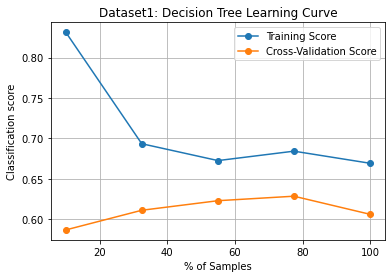

In [405]:
# Learning Curve 
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=5)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_dt_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset1: Decision Tree Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()


## Section 2: KNN

In [406]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn = clf_knn.fit(X_train,y_train)
y_pred = clf_knn.predict(X_test)
accuracy_before[1] = metrics.accuracy_score(y_test, y_pred)*100

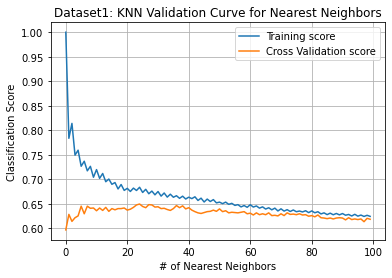

In [407]:
# tuning the hyperparameter
cv = StratifiedKFold(n_splits=5)
train_scores, test_scores = validation_curve(clf_knn, X_train, y_train, param_name="n_neighbors", 
                                             param_range=np.arange(100) + 1, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset1: KNN Validation Curve for Nearest Neighbors')
plt.xlabel('# of Nearest Neighbors')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()


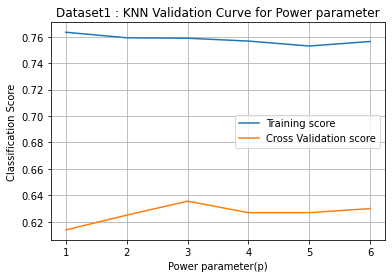

In [408]:
cv = StratifiedKFold(n_splits=5)
# second hyperparameter weights
param_name= 'weights'
param_range=['uniform', 'distance']
# this is did not help
# let's look at another
# https://www.datavedas.com/knn-distance-metrics/
param_name = 'p'
param_range = np.arange(7)
train_scores, test_scores = validation_curve(clf_knn, X_train, y_train, param_name=param_name, 
                                             param_range=param_range, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset1 : KNN Validation Curve for Power parameter')
plt.xlabel('Power parameter(p)')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()


<AxesSubplot:>

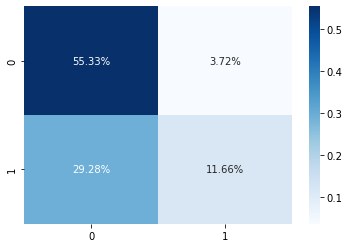

In [409]:
best_K=29
best_p=2
best_weight='distance'
clf_knn_best = KNeighborsClassifier(n_neighbors=best_K, weights=best_weight,p=best_p )
t_before = tm.time()
clf_knn_best = clf_knn_best.fit(X_train,y_train)
t_after = tm.time()
fit_time[1] = t_after - t_before
t_before = tm.time()
y_pred = clf_knn_best.predict(X_test)
t_after = tm.time()
inference_time[1] = t_after - t_before
accuracy_after[1] = metrics.accuracy_score(y_test, y_pred)*100
cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [410]:
## Learning Curve

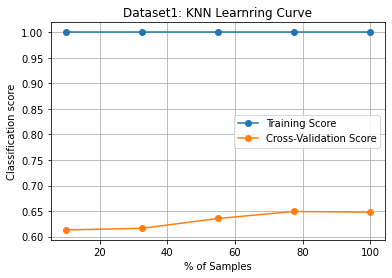

In [411]:
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_knn_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset1: KNN Learnring Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

## Section 3: Ada Boosting

In [412]:
# refreences:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
clf_ada_boost = AdaBoostClassifier(n_estimators=50, random_state=7)
clf_ada_boost = clf_ada_boost.fit(X_train,y_train)
y_pred = clf_ada_boost.predict(X_test)
accuracy_before[2] = metrics.accuracy_score(y_test, y_pred)*100

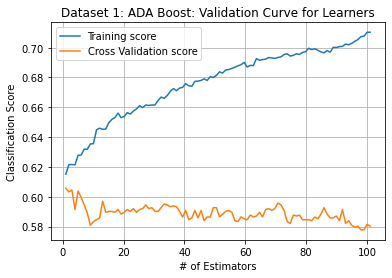

In [413]:
# Validation curve while modifying the number of weak learners
cv = StratifiedKFold(n_splits=5)
train_scores, test_scores = validation_curve(clf_ada_boost, X_train, y_train, param_name="n_estimators", 
                                             param_range=np.arange(100) + 1, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(np.linspace(1, 101, 100), np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.linspace(1, 101, 100), np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset 1: ADA Boost: Validation Curve for Learners')
plt.xlabel('# of Estimators')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()



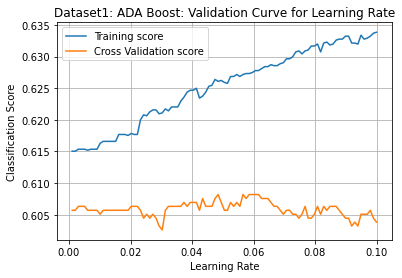

In [414]:
learning_rate_range=np.linspace(0,0.1,100)
#learning_rate_range=np.arange(50)
train_scores, test_scores = validation_curve(clf_ada_boost, X_train, y_train, param_name="learning_rate", 
                                             param_range=learning_rate_range, cv=cv, n_jobs=-1)

plt.figure()
plt.plot( learning_rate_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot( learning_rate_range, np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset1: ADA Boost: Validation Curve for Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()


<AxesSubplot:>

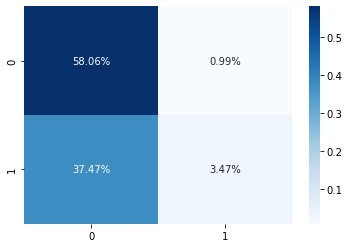

In [415]:
#experiment with different values to find the optimal value.
best_weak_learners=8
best_learner_rate=0.085
clf_boosting_best = AdaBoostClassifier(n_estimators=best_weak_learners,learning_rate=best_learner_rate,random_state=7)
t_before = tm.time()
clf_boosting_best = clf_boosting_best.fit(X_train,y_train)
t_after = tm.time()
fit_time[2] = t_after - t_before

t_before = tm.time()
y_pred = clf_boosting_best.predict(X_test)
t_after = tm.time()
inference_time[2] = t_after - t_before
accuracy_after[2] = metrics.accuracy_score(y_test, y_pred)*100
cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')


In [426]:
#LEARNING CURVE 

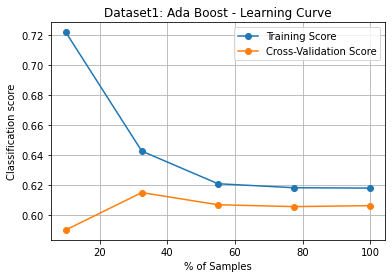

In [416]:
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_boosting_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset1: Ada Boost - Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

## Section 4: SVM 

In [417]:
# Refrence:
# https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

from sklearn.svm import SVC
clf_svm = SVC(kernel='linear', random_state=7)
clf_svm = clf_svm.fit(X_train,y_train)
y_pred = clf_svm.predict(X_test)
accuracy_before[3] = metrics.accuracy_score(y_test, y_pred)*100

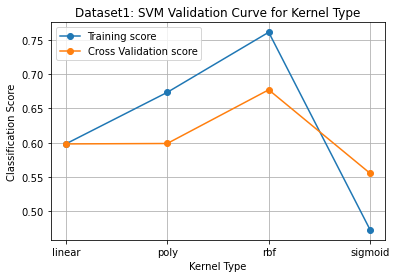

In [418]:
# creating the validation curve for the kernel type:
# office hours: don't use the sigmoid <-- check that again
# don't use the precomputed <-- this 
kernel_type=['linear', 'poly', 'rbf', 'sigmoid']
clf_svm = SVC(kernel='linear', random_state=7)
train_scores, test_scores = validation_curve(clf_svm, X_train, y_train, param_name="kernel", 
                                             param_range=kernel_type, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(kernel_type,np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(kernel_type, np.mean(test_scores, axis=1), 'o-', label='Cross Validation score')
plt.title('Dataset1: SVM Validation Curve for Kernel Type')
plt.xlabel('Kernel Type')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()


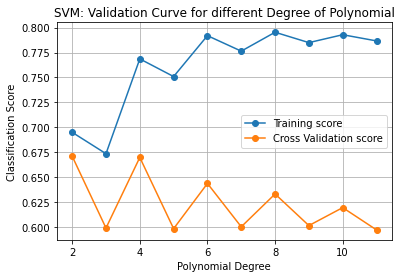

In [419]:
#ensuring if any higher degree polynomials perform better 
degree=[2,3,4,5,6,7,8,9,10,11]
clf_svm_test_poly = SVC(kernel='poly', random_state=7)
train_scores, test_scores = validation_curve(clf_svm_test_poly, X_train, y_train, param_name="degree", 
                                             param_range=degree, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(degree,np.mean(train_scores, axis=1), 'o-',label='Training score')
plt.plot(degree, np.mean(test_scores, axis=1), 'o-',label='Cross Validation score')
plt.title('SVM: Validation Curve for different Degree of Polynomial')
plt.xlabel('Polynomial Degree')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()

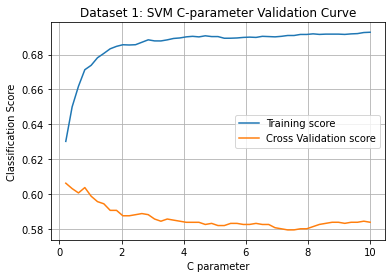

In [420]:
# second hyperparameter: C
#C_range = np.logspace(-5, -0.1, 25)
C_range = np.linspace(0, 10, 50)
clf_svm = SVC(kernel='poly', random_state=7)
train_scores, test_scores = validation_curve(clf_svm, X_train, y_train, param_name="C", 
                                             param_range=C_range, cv=cv, n_jobs=-1)

plt.figure()
train_scores.round(4)
test_scores.round(4)
plt.plot(C_range, np.mean(train_scores.round(4), axis=1), label='Training score')
plt.plot(C_range, np.mean(test_scores.round(4), axis=1), label='Cross Validation score')
plt.title('Dataset 1: SVM C-parameter Validation Curve')
plt.xlabel('C parameter')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.ticklabel_format(useOffset=False)
plt.show()

<AxesSubplot:>

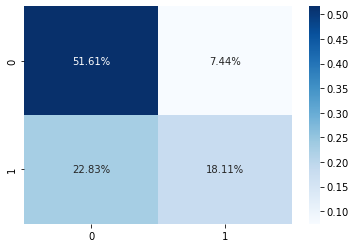

In [421]:
best_kernel='rbf'
#C_best=0.680192
C_best=2.5
clf_svm = SVC(kernel=best_kernel, C=C_best, random_state=7)
t_before = tm.time()
clf_svm = clf_svm.fit(X_train,y_train)
t_after = tm.time()
fit_time[3] = t_after - t_before
t_before = tm.time()
y_pred = clf_svm.predict(X_test)
t_after = tm.time()
inference_time[3]=0
accuracy_after[3] = metrics.accuracy_score(y_test, y_pred)*100
cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 333, in _dens

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 333, in _dens

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 333, in _dens

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 333, in _dens

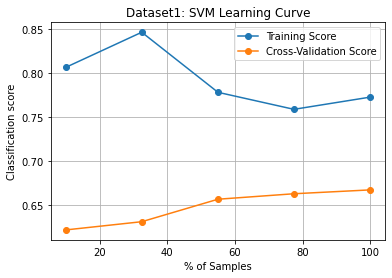

In [422]:
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(classifier_svm_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset1: SVM Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

## Section 5: Neural Network

In [423]:
# Building a Neural Network
# starting this section save the refrences 
# https://scikit-learn.org/stable/modules/
#   generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
# 
clf_NN = MLPClassifier(solver='lbfgs', activation='relu',max_iter=300,
                    hidden_layer_sizes=(5,2), random_state=7)
clf_NN = clf_NN.fit(X_train,y_train)
y_pred = clf_NN.predict(X_test)
accuracy_before[4] = metrics.accuracy_score(y_test, y_pred)*100

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssa

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

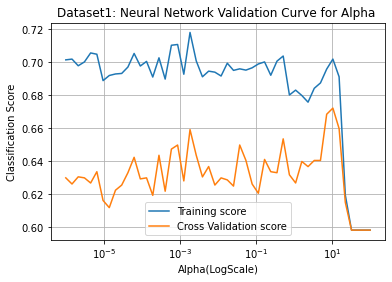

In [424]:
# Two hyperparameter to tune are the Learning Rate and numeber of hidden perceptrons hidden_layer_sizes
cv = StratifiedKFold(n_splits=5)
alpha_val = np.logspace(-6, 2, 50)
train_scores, test_scores = validation_curve(clf_NN, X_train, y_train, param_name="alpha",
                                             param_range=alpha_val, cv=cv, n_jobs=-1)

plt.figure()
plt.semilogx(alpha_val, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_val, np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset1: Neural Network Validation Curve for Alpha ')
plt.xlabel('Alpha(LogScale)')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
#plt.ticklabel_format(useOffset=False)
plt.show()


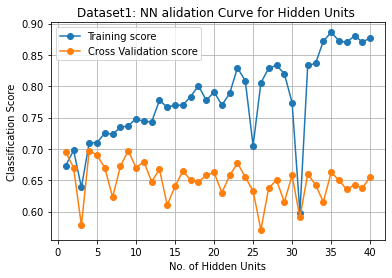

In [425]:
# find number of hidden unit
hidden_unit_size = 40
test_data = np.zeros(hidden_unit_size)
train_data = np.zeros(hidden_unit_size)
hidden_layers = list(range(1, hidden_unit_size+1)) 

for i in hidden_layers:
    clf_NN = MLPClassifier(solver='lbfgs', activation='relu',
                    hidden_layer_sizes=(i,2), random_state=7)
    clf_NN.fit(X_train,y_train)
    y_pred = clf_NN.predict(X_test)
    y_pred_train = clf_NN.predict(X_train)
    test_data[i-1] = metrics.accuracy_score(y_test, y_pred)
    train_data[i-1] = metrics.accuracy_score(y_train, y_pred_train)

plt.figure()
plt.plot(hidden_layers,train_data ,'o-', label='Training score')
plt.plot(hidden_layers,test_data ,'o-', label='Cross Validation score')
plt.title('Dataset1: NN alidation Curve for Hidden Units ')
plt.xlabel('No. of Hidden Units')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.ticklabel_format(useOffset=False)
plt.show()

<AxesSubplot:>

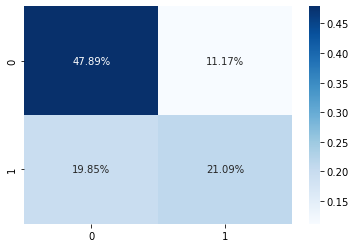

In [436]:
best_hidden_layers=(8,2)
best_alpha=0.6
clf_NN_best= MLPClassifier(solver='lbfgs', activation='relu',alpha=best_alpha,
                    hidden_layer_sizes=best_hidden_layers, random_state=7)
t_before = tm.time()
clf_NN_best = clf_NN_best.fit(X_train,y_train)
t_after = tm.time()
fit_time[4] = t_after - t_before
t_before = tm.time()
y_pred = clf_NN_best.predict(X_test)
t_after = tm.time()
inference_time[4] = t_after - t_before
accuracy_after[4] = metrics.accuracy_score(y_test, y_pred)*100
cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [437]:
# Learning Curve

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

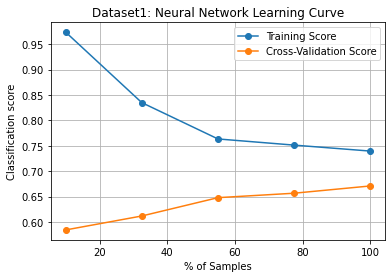

In [438]:
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_NN_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset1: Neural Network Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

In [439]:
# Loss curve
# https://niruhan.medium.com/drawing-loss-curves-for-deep-neural-network-training-in-pytorch-ac617b24c388

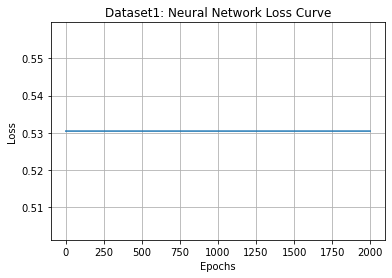

In [441]:
num_epochs = 200
loss_epochs = np.zeros(num_epochs)
for epoch in range(num_epochs):
    clf_NN_best.fit(X_train,y_train)
    loss_epochs[epoch] = clf_NN_best.loss_
    
plt.figure()
plt.plot(loss_epochs)
plt.grid()
plt.title('Dataset1: Neural Network Loss Curve')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()


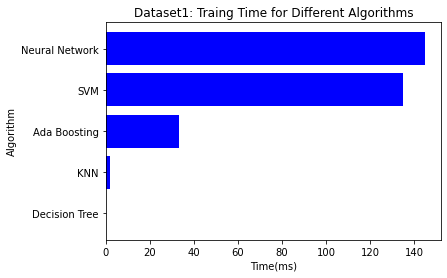

In [346]:
plt.barh(algotrithms, fit_time*1000, color='blue')
plt.xlabel("Time(ms)")
plt.ylabel("Algorithm")
plt.title("Dataset1: Traing Time for Different Algorithms")
plt.show()

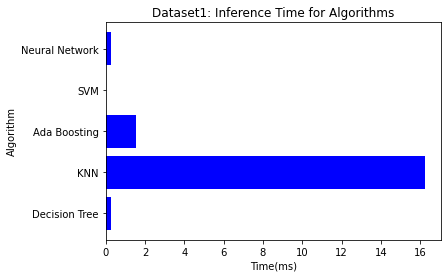

In [258]:
plt.barh(algotrithms, inference_time*1000, color='blue')
plt.xlabel("Time(ms)")
plt.ylabel("Algorithm")
plt.title("Dataset1: Inference Time for Algorithms")
plt.show()

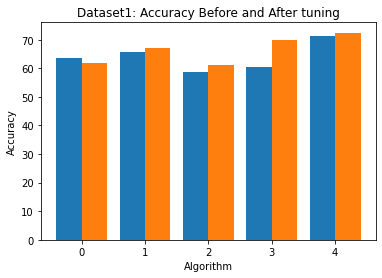

In [217]:
X_axis = np.arange(len(algotrithms))
plt.bar(X_axis - 0.2, accuracy_before, 0.4, label = 'Before Tuning')
plt.bar(X_axis + 0.2, accuracy_after, 0.4, label = 'After tuning')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Dataset1: Accuracy Before and After tuning")
plt.show()


In [255]:
print(accuracy_before)
print(accuracy_after)

[63.77171216 65.75682382 58.56079404 60.54590571 71.21588089]
[61.7866005  66.99751861 61.04218362 69.9751861  72.45657568]
